In [1]:
import tweepy
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
api_key = "FRoUKq4HMYIkj2Ykf9Pb2o3WF"
api_secret_key = "x2UYgYM30KvMM3E1uhi9dpPrZ6XdTgKNvxJ3lvK1rBaVN2lvFp"
access_token = "926363307295965185-waUlnNAKcVhnXvrLHfDVNZCvMfEU1L1"
access_token_secret = "Dlslg0lIp8BhbG1smnWkoyxzpsanemxg9RNZQl7nkJDhx"

In [3]:
auth = tweepy.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, 
wait_on_rate_limit_notify=True, compression=True)

# **No 1 (User Profile)**
Build a crawler that collects a user's profile information from Twitter given the user's Twitter ID

User's ID = "taner0_"

In [4]:
profil = api.get_user(screen_name='taner0_')
print("user id:", profil.id)
print("user name:",profil.screen_name)
print("user location:", profil.location)
print("user bio:", profil.description)
print("user followers count:", profil.followers_count)
print("user friends count:", profil.friends_count)
print("the number of Tweets (including retweets) issued by the user:", profil.statuses_count)
print("user account was created on Twitter", profil.created_at)
print("user url: ", profil.url)

user id: 926363307295965185
user name: taner0_
user location: 
user bio: STAY - Fujo - Nijisanji fans - Holopro fans
user followers count: 16
user friends count: 217
the number of Tweets (including retweets) issued by the user: 843
user account was created on Twitter 2017-11-03 08:19:58
user url:  None


# **No 2 (Social Network)**
Build a crawler that collects a user's social network information given the user's ID

User's ID = "taner0_"

In [5]:
user = api.get_user(screen_name='taner0_')
print("user name:",user.screen_name)

user name: taner0_


In [6]:
print("following:",user.friends_count)
for friend in user.friends():
   print(friend.screen_name)

following: 217
n0ah_kurumi
ApexerCpt
CRCupApex
crazyraccoon406
NaO_O28
tsukishitakaoru
hhhyorih
052122ta
HOK5GT
p01102018
cover_corp
rszelon
twitcastinglive
K_521212
Selen_Tatsuki
unou_mha
natsuiromatsuri
hironeko
yuzukichococh
Genshin_7


In [7]:
print("followers:",user.followers_count)
for followers in user.followers():
   print(followers.screen_name)

followers: 16
n_art13
__fifi__07
Haruka27091810
christinalim__
AnnisaFitria_06
Shaaggyy2
yusufyop
etedadd
spiritpunx
nadyap_s
hannah2official
alifanedyaa
AliyaDinda2
nstrxxxx
millanieca
nadanesyifa


In [8]:
user_list = ["926363307295965185"]
follower_list = []
for user in user_list:
    followers = []
    try:
        for page in tweepy.Cursor(api.followers_ids, user_id=user).pages():
            followers.extend(page)
            print(len(followers))
    except tweepy.TweepError:
        print("error")
        continue
    follower_list.append(followers)

16


In [9]:
df = pd.DataFrame(columns=['source','target'])
df['target'] = follower_list[0]
df['source'] = 926363307295965185

In [10]:
G = nx.from_pandas_edgelist(df, 'source', 'target')
pos = nx.spring_layout(G)

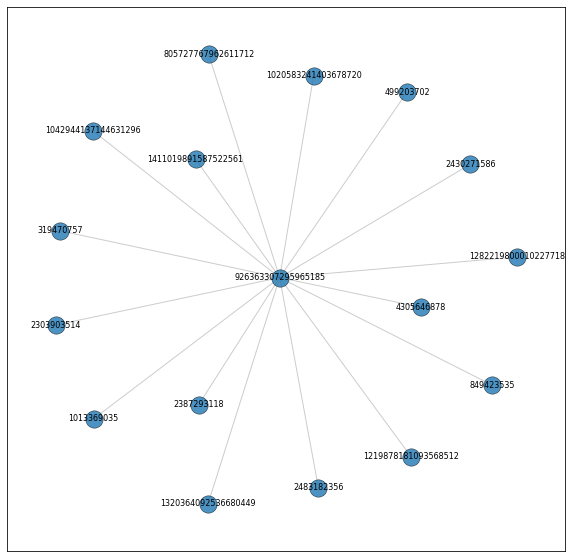

In [11]:
f, ax = plt.subplots(figsize=(10, 10))
plt.style.use('ggplot')
nodes = nx.draw_networkx_nodes(G, pos, alpha=0.8)
nodes.set_edgecolor('k')
nx.draw_networkx_labels(G, pos, font_size=8)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.2)

# **No 3 (Search & Geo)**
Build a crawler that collects the tweets using a set of specified keywords and a geolocation based criteria

Kata pencarian = "Senang"
Lokasi = Sukaraja, Bogor

In [32]:
search_words = "happy"
tweets1 = tweepy.Cursor(api.search,q=search_words).items(50)
tweets1

In [33]:
i=1
for tweet in tweets1:
  print(i,"Tweet:",tweet.text)
  i+= 1

1 Tweet: RT @osuoraatai: 【アタイのアタイによるアタイフォロワーの企画】

深夜にHAPPYキャンペーン💘

アマギフ1000円分×3名様にプレゼント🎁

応募方法
①このアタイツイートをいいね♡
②アタイ@osuoraatai をフォロー

当選者様には深夜にDMにて祝…
2 Tweet: RT @__2raw: Breakups are ok. Starting over is ok. Moving on is ok. Saying no is ok. Being alone is ok. What is not ok is staying somewhere…
3 Tweet: RT @texturedheir: Happy Birthday @ashanti  Legendary vocals, legendary pen, legendary beauty. We cannot wait to hear her new version of her…
4 Tweet: Still going terribly and if I never have to study Chaucer again I shall die a happy man https://t.co/y1tFHNGFzn
5 Tweet: RT @jjklve_: jungkook singing jimin happy birthday!!! https://t.co/OQpOOHSjo4
6 Tweet: RT @hbd_mm: 🍏

11월 13일 매화의 생일을 맞아,
주거취약계층의 자립을 돕는 &lt;빅이슈 코리아&gt; 262호 스프레드 지면 광고를 진행합니다.

양매화 어머니회 회원분들의 많은 관심 부탁드립니다.

#HAPPY_MAEHWA_DAY
#겨울에_핀…
7 Tweet: RT @PyaariiLadkii: Finally teja ki entry ho gyi bb house main 🤩

Literally so happy for her 😭❤ she deserves this ❤

#TejasswiPrakash #BB15…
8 Tweet: RT @btschimmychim: Happy birt

In [30]:
geo = '-6.59476524,106.82446282,235km'
tweets = tweepy.Cursor(api.search,geocode=geo).items(50)
tweets

In [31]:
i=1
for tweet in tweets:
  print(i,"Tweet:",tweet.text)
  i+= 1

1 Tweet: Kucing tetangga pake kalung yg bunyi, tiap denger suara krincingnya, horor banget. Arah suaranya bukan dari luar ru… https://t.co/o3uSmxtN9l
2 Tweet: @tokopedia Semangat!
#UsahaLokal #BangkitBersama
#UsahaLokal #BangkitBersama
👉 5.277
3 Tweet: @crypto_bearr Done https://t.co/cfrq7sHCBy
4 Tweet: @FWBESS Gas
5 Tweet: @minumbobayuk ayo makan beb https://t.co/3h9vt4M2yy
6 Tweet: Mungkin harus sedikit gila ,untuk menghadapi dunia yang penuh drama

Srepeeet :v
7 Tweet: Gunung Merapi Alami 203 Kali Gempa Guguran Dalam Sehari https://t.co/r1fY6jdARt
8 Tweet: @Iiquorcy @CryptosHeaven1 ch
9 Tweet: नेपाललाई कोरोनामुक्त बनाउन ध्यान केन्द्रित गर्छु : नवनियुक्त स्वास्थ्यमन्त्री खतिवडा - Rabi Bazar News https://t.co/ogpfUmD9gO
10 Tweet: Layanan Pengurusan PT di Rancasari – Kota Bandung https://t.co/JHAlyOnx1X
11 Tweet: Pake masker, diinisialkan, minta maaf, kelar
No jail time needed https://t.co/vyUcNabsFG
12 Tweet: @DickDurbin BETTER NOW THAN NEVER!
#ReplenishRRF #SaveRestaurants 
@HouseDem